# Réception, décodage et affichage d’une image satellite METEOR-M2
                               PARTIE 1: Réception et extraction des données

Meteor-M2 est un satellite météorologique Russe lancé en 2014 et qui se trouve en orbite basse
autour de la Terre à une altitude d’environ 830 km. Sa période de révolution est de l’ordre de 100
minutes. Une de ses missions principales est de surveiller le réchauffement climatique en mesurant la
température des océans et en estimant la fonte des glaces polaires. Il est équipé de plusieurs capteurs
HD qui envoient des données d’imagerie vers les stations aux sols sur 3 bandes principalement. Lorsqu’il
transmet en journée, elles se situent généralement dans le visible pour la première, dans le rouge et le
proche infrarouge pour la deuxième et dans l’infrarouge plus lointain pour la troisième. Les données
images reçues sont envoyées compressées au format JPEG.
![title](images/lrptoff.png)
Figure 1 – Le programme "LRPT Offline Decoder" permet de décoder les données reçues et affiche
l’image en tenant compte des informations reçues sur les trois canaux.
![title](images/fig2.png)
Figure 2 – D’autres programmes comme "LRPT Enhancer" permettent de changer le type de projec-
tion ainsi que d’afficher des couleurs plus "naturelles" (image "brute" à gauche et améliorée à droite)

Nous nous proposons, au cours de ce TP, d’étudier la chaîne de traitement du protocole LRPT
utilisé ici, de la réception à l’affichage de l’image.



# I. RÉCEPTION DU SIGNAL
## 1. Le protocole LRPT

Il existe différents protocoles utilisés par les différents satellites météorologiques en orbite basse
autour de la Terre : APT, LRPT, HRPT...etc. Le satellite Meteor M2 utilise le protocole LRPT,
relativement bien documenté.
![title](images/lrpt.png)
La fréquence actuelle de transmission est 137,1 MHz, et utilise une onde électromagnétique polarisée circulairement.

## 2. Antenne dipôle en V

Une antenne simple à réaliser et permettant l’obtention de résultats satisfaisants est l’antenne
dipôle "en V" (on applique un certain angle entre les deux brins afin de réaliser la meilleure adaptation
d’impédance possible).

1. **Calculer la longueur théorique de chaque brin du dipôle (longueur totale du dipôle : λ/2).**


LAMBDA/4=l=54CM

2. **Pourquoi est-il important d’assurer l’adaptation d’impédance dans le cas de la réception
ou de l’émission d’un signal électromagnétique ?**


Lorsqu’une onde électromagnétique change de milieu de propagation, il se produit, à l’interface
entre les deux milieux, un phénomène de réflexion d’autant plus important que les impédances des
deux milieux sont différentes, phénomène qui nuit grandement à la transmission du signal reçu vers le
récepteur.

3. **En utilisant la Figure 3 ci-dessous, déterminer la valeur de l’angle théorique optimal pour
assurer l’adaptation d’impédance à appliquer entre les deux brins du dipôle ?**


D’après la Figure 3, l’angle de 120° correspond au plus bas taux d’onde stationnaire, il assure
théoriquement la meilleure adaptation d’impédance. Remarque : ici, l’environnement électromagnétique
va avoir une influence importante, la hauteur de l’antenne par rapport au sol...etc. De nombreux
paramètres ne sont pas pris en compte dans cette étude et lors de la réception, il ne faut pas hésiter
à changer la hauteur de l’antenne, changer légèrement l’angle et/ou la longueur des brins, l’incliner
légèrement afin d’obtenir la meilleure réception...

4. **En utilisant les informations données en introduction de ce document, celles données dans
le Doc. 1 et sur la Figure 3, établir un bilan de liaison afin d’estimer la puissance en W
absorbée par l’antenne en réception pour les deux valeurs extrèmes de la PIRE donnée.
Convertir ces puissances en dBm.**


Dans le Doc. 1 on nous indique que l’EIRP (=PIRE en français) pour l’émission vaut entre 3,2 et
8 dBW. Sur la Figure 3, on lit un gain G r = 7dBi = 10 0,7 pour l’angle de 120°. Ne pas oublier de
convertir les dBW en W : P IRE = P e G e = 8dBW = 10 0,8 W dans le cas le plus favorable.
−88dBm
ou -94dBm dans le pire des cas.

5. **En estimant la sensibilité du récepteur DVB-T utilisé à -110 dBm, peut-on espérer récupérer un signal significatif grâce à notre dispositif ?**


Oui, grâce à notre montage on peut espérer se situer de +16 à +22 dB au-dessus de la sensibilité
du récepteur, ce qui est suffisant pour décoder un signal.

![title](images/fig3.png)

Pour affiner un peu notre estimation, il faut tenir compte du fait que l’onde émise par le satellite
est polarisée circulairement.


6. **Quelle devrait être la polarisation de l’antenne de réception pour récupérer le maximum
de signal ? Est-ce le cas ?**


Pour récupérer le maximum de signal il faudrait une antenne dont la polarisation est également
circulaire. Ce qui n’est pas le cas ici avec un dipôle de polarisation rectiligne.

On peut montrer que le fait de réceptionner une onde polarisée circulairement avec une antenne
dipôle polarisée rectilignement engendre une perte de 3 dB (on ne récupère qu’une seule des deux
composantes circulaires incidentes).

7. **Peut-on tout de même espérer une réception convenable du signal ? Pourquoi utiliser une
antenne dipôle alors ?**


Le dipôle est très simple à réaliser. Ce n’est effectivement pas optimal et diminue un peu nos
chances de décodage, on peut tout de même espérer rester entre +13 et +19dB au-dessus du bruit ce
qui n’est déjà pas si mal. En construisant une antenne polarisée circulairement, qui serait plus complexe
à réaliser, on pourrait espérer gagner au maximum 3dB (en supposant notre construction parfaite). Il
peut en effet s’agir d’une piste intéressante dans le cas où on souhaiterait améliorer la réception.

## 3. Réception du signal et enregistrement des données
Ouvrir le fichier "meteor.grc" ([6]) représenté sur la Figure 4 et compléter le champ Frequency.
8. **Calculer la valeur du paramètre "omega" du bloc "Clock Recovery MM" sachant qu’il
correspond au nombre d’échantillons par symbole.**

![title](images/fig4.png)


Il faut déjà connaître le nombre d’échantillons par seconde au niveau de ce bloc. L’étude du
graphe GNU Radio nous indique une valeur initiale du paramètre "samp_rate" de 1.4112e6 MHz,
qui correspond à la fréquence d’échantillonnage. En observant la suite nous constatons une unique
décimation d’un facteur 9, le flux de données arrivant au bloc "Clock Recovery MM" est donc de
1.4112e6/9=156.8kHz.
D’autre part, l’étude du doc 1, nous permet de connaître le débit de symbole : 72kbauds (72000

symboles par seconde). On en déduit le nombre d’échantillons par symboles :
156.8/72= 2, 17778 = omega

9. **Quel est le type de modulation ? Expliquer rapidement. Combien a t-on de bits par
symboles ?**


Modulation QPSK = Quadrature Phase Shift Keying. Modulation par déplacement de phase à 4
états. n=2 bits par symbole.

###### On rajoute un bloc "QT GUI Frequency Sink" directement en sortie du bloc source, on observe
les graphiques suivants lors de la transmission :

![title](images/fig5.png)

10. **Estimer la valeur de l’occupation spectrale de la modulation QPSK. Comparer aux in-
formations données dans le Doc. 1.**


L’occupation spectrale correspond à la largeur du lobe principal de la réponse en fréquence : environ
120-130 kHz par lecture graphique. Ce qui correspond à ce qui est indiqué dans le Doc. 1 : Bandwith
∼ 120kHz

11. **En observant la Figure 5, à combien de dB au-dessus du bruit se situe le signal ? Est-ce
cohérent avec le bilan de liaison effectué plus haut ?**


On estime environ le bruit à -80dB et le signal à environ -60dB, ce qui fait une différence de +20dB,
ce qui est cohérent avec l’étude du bilan de liaison. En effet, au vu de la constellation bien "nette",
on peut penser que la capture de la Figure 5 a été réalisée dans les meilleures conditions, lorsque le
satellite est proche du zénith.

12. **Observer les paramètres du bloc "Constellation Soft Decoder" et compléter le schéma
(Figure 5 à droite) avec les valeurs binaires 00, 01, 10 et 11 correspondant à chaque points
de coordonnées ±1 ± j**


-1-j: 00
-1+j: 01
1+j: 11
1-j: 10

digital.constellation_calcdist(([-1-1j, -1+1j, 1+1j, 1-1j]), ([0, 1, 3, 2]), 4, 1).base()

![title](images/fig6.png)

Pour le traitement ultérieur, chaque valeur comprise entre [-1 ;1] est convertie dans la gamme [-
127 ;127] et stockée sur un octet (signed char) dans un fichier binaire nommé ici "ex.s". Par la suite
nous nommerons "softs bits" ces octets.
C’est ce fichier qui est traité par "LRPT Offline Decoder" présenté en introduction ou encore par
"meteor-decoder" ([6]) et c’est ce fichier que nous allons traiter pour afficher l’image JPEG.
Pour simplifier et diminuer la quantité de donnée à traiter, nous allons travailler sur une petite
fraction de ce fichier (quelques lignes correspondant au milieu de l’image). Ce fichier de travail se
nomme "binarymeteor.s".


# II. DES "SOFTS BITS" AUX BITS
## 1. Affichage des "softs bits" et de la constellation

Importer la bibliothèque numpy,
ouvrir le fichier binaire et lire les valeurs avec le type int8 :


In [6]:
import numpy as np
f = open("binarymeteor.s","rb")
soft_bits = np.fromfile(f,dtype = np.int8)

13. **Faire afficher les 20 premières valeurs pour vérifier le bon fonctionnement de vos commandes.**

In [24]:
soft_bits[:20]

array([ -68,   71,   41,  -51,   26,   49, -103,   79,   57,   82,   65,
        -72,   59,   57,   68,  -77,  -79,  -67,   82,   78], dtype=int8)

Afin de valider complètement notre compréhension de ce fichier, nous allons maintenant ré-afficher
la constellation avec matplotlib. Pour cela, récupérer les valeurs paires dans une nouvelle liste x
(abscisses) et les valeurs impaires dans une nouvelle liste y (ordonnée). Taper les commandes ci-
dessous en complétant éventuellement les pointillés :


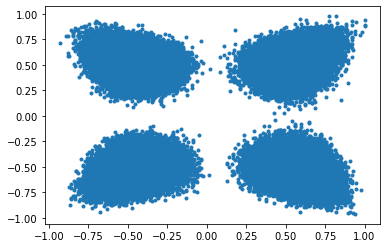

In [7]:
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(len(soft_bits)//2):
    x.append(soft_bits[2*i]/127.0)
    y.append(soft_bits[2*i+1]/127.0)
plt.plot(x,y, ".")
plt.show()

14. **Quel est le rôle de la division par 127 ?**


On revient dans la gamme [-1;1]

15. **Proposer une méthode pour obtenir le message binaire (passage des "softs bit" aux
"hards bits" (0 ou 1).**
                                                          


Si la valeur du soft bit >0 c’est un 1 et si la valeur du soft bit est <0 c’est un 0.

Compléter le bout de programme permettant de réaliser cette opération et le réaliser.


In [8]:
hard_bits =""
for i in range(len(soft_bits)):
    if soft_bits[i] >= 0:
        hard_bits += "1"
    if soft_bits[i] < 0:
        hard_bits += "0"

Vérifier en affichant les 10 premières valeurs de soft_bits et de hard_bits :


In [9]:
print(soft_bits[:9])  
print(hard_bits[:10])  

[ 68 -71 -41  51 -26 -49 103 -79 -57]
1001001000


Avons-nous terminé le travail de décodage ? Les informations binaires sont-elles exploitables ? Pour
le vérifier, il va falloir retrouver le code de synchronisation "1ACFFC1D" que l’on doit retrouver au
début de chaque paquet envoyé (d’après la documentation).

## 2. Mot de synchronisation et algorithme de viterbi

La documentation technique du protocole LRPT nous informe que toutes les transmissions sont
synchronisées avec le mot 0x1ACFFC1D. C’est donc ce mot que nous allons chercher à trouver
parmi nos données. Seulement nous n’allons pas le trouver comme ça. La documentation nous indique
également que le protocole LRPT, afin de fiabiliser la communication, double le nombre de bits envoyé
en utilisant un encodage de viterbi. C’est donc l’encodage par viterbi du mot 0x1ACFFC1D que
nous devons trouver.

![title](images/viterbi3.png)


16. **Pour trouver l’équivalent du mot de synchronisation encodé par l’algorithme de viterbi
(compléter les pointillés) :**


In [25]:
import viterb
G1 = [1 , 1 , 1 , 1 , 0 , 0 , 1 ]
G2 = [1 , 0 , 1 , 1 , 0 , 1 , 1 ]
mot = [0 , 0 , 0 ,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,1 ] #1ACFFC1D
viterb.encode_viterbi(mot,G1,G2)

'0101011000001000000111001001011100011010101001110011110100111110'

17. **Chercher dans la suite hard_bits si la séquence ci-dessus est présente, et si oui, combien
de fois. Commenter.**


In [11]:
hard_bits.count("0101011000001000000111001001011100011010101001110011110100111110")


0

Pour la démodulation, le récepteur possède un oscillateur local (OL) qui doit recréer une copie de
la fréquence porteuse qui a été générée par l’oscillateur au niveau de l’émetteur (satellite). C’est en
mélangeant la fréquence recréée par l’oscillateur local avec le signal réceptionné que la démodulation a
lieu. Il n’y a cependant aucune raison que les deux oscillateurs soient parfaitement synchronisés et ce
décalage entre les deux oscillateurs, produit un déphasage qui augmente ou diminue continuellement.
Si aucun dispositif n’est mis en place pour compenser ce décalage, cet effet va se traduire par une
rotation continue des symboles dans le plan (I,Q). Pour éviter cela, on utilise la boucle de Costas
("Costas loop" dans le fichier grc), qui est un système à verrouillage de phase (PLL - Phase Loop Lock
en anglais), comme le montre la Figure 7 ci-dessous dans laquelle la boucle de Costas a été désactivée.

![title](images/rotconst.png)

Figure 7 – La boucle de Costas permet de compenser le décalage en phase généré lors de la réception
du signal. Sa désactivation lors de la réception produit une rotation continue des symboles de la
constellation.

18. **Proposer une ou plusieurs explications au résultat de la question précédente.**

Le mot de synchronisation n'est pas présent car le verrouillage de la constellation ne s'est pas fait au bon moment... (Les symboles ne correspondent pas au valeurs binaires...). 
Autre hypothèse, il y a beaucoup d'erreurs et notre fichier est corrompu.

# 3. Symétries et rotations au sein de la constellation
Pour résoudre notre problème, il faut lever l’ambiguité sur la valeur de la phase. On peut ainsi montrer qu’il y a 8
possibilités au total qui suivent toutes le code de Gray:

![title](images/rotation.png)

À ce moment-là le code de synchronisation précédent n’est peut-être pas sous la forme que nous
avons vue précédemment. Il pourrait donc être, selon les huit possibilités ci-dessous:

1: 0101011000001000000111001001011100011010101001110011110100111110

2: 0000001110101110100001101100000110001111111100011001010010010111

3: 1010100111110111111000110110100011100101010110001100001011000001

4: 1111110010100010101101100011110110110000000011011001011110010100

Nous allons à présent utiliser une fonction de numpy qui va réaliser la corrélation entre les différents
mots possibles et les valeur des softs bits. Lorsque nous affichons la partie réelle de cette corrélation,
la présence de pics de corrélation positifs indique la présence du motif (la présence de pics de corrélation négatifs indique la présence du motif complémentaire).


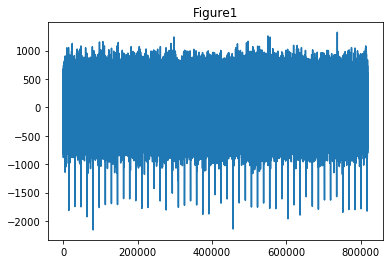

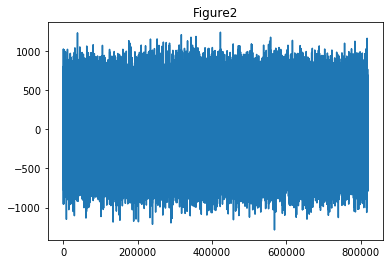

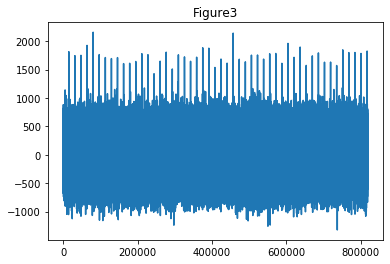

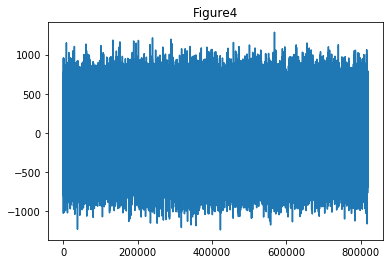

In [13]:
mot = np.array([
[0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0],
[0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1],
[1,0,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1],
[1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,1,1,0,1,0,0,0]])
for i in range(len(mot)):
    x = np.correlate(soft_bits, mot[i]-np.mean(mot[i]))
    plt.figure(i+1)
    plt.title("Figure{}".format(i+1))
    plt.plot((x.real))


plt.show()

19. **Le motif cherché est-il présent ? Noter le numéro de la figure présentant des pics de corrélation positifs.**


Oui le motif 3 donne des pics de corrélations positifs. C'est bon signe pour la suite!!

20. **Combien compte t-on de corrélations ? De quelle valeur chaque pic est espacé du suivant ?
Est-ce cohérent avec la valeur de 16384 annoncé dans la documentation ? Est-ce cohérent
avec la taille du fichier en octet ?**


On compte 50 pics, donc 50 corrélations. Tous les pics sont espacés de 16384 échantillons. 50 x
16384 = 819200 = 819,2 ko le poids du fichier.

# 4. Silence.. On tourne!
Que faut-il faire pour remettre les symboles à leurs places dans la constellation?

10 → ... ; 01 → ... ; 00 → ... ; 11 → ....




21. **Compléter le programme suivant permettant de remettre
les symboles "dans l’ordre" :**

Il faut inverser chaque bit (la constellation a fait un demi-tour).

In [20]:
for i in range(0,len(soft_bits)):
    soft_bits[i]=-soft_bits[i]
                                 
g=open("entreeViterbi.bin","wb")  #Enregistrement des données corrigées
g.write(soft_bits)
g.close()

22. **Reprendre les questions 15 et 17 (conversion en hard_bits puis recherche du mot de
synchronisation encodé par Viterbi). Est-ce bon cette fois-ci ? Commenter.**

In [26]:
hard_bits =""
for i in range(len(soft_bits)):
    if soft_bits[i] >= 0:
        hard_bits += "1"
    if soft_bits[i] < 0:
        hard_bits += "0"
hard_bits.count("0101011000001000000111001001011100011010101001110011110100111110")


2

2 occurences... Ce n'est pas beaucoup... On devrait trouver 50 occurences!!! Mais et viterbi, il sert à quoi alors?

# 5. Viterbi intervient !

La fonction **decode\_viterbi(mot)** permet de décoder un mot binaire qui a préalablement été encodé par l'algorithme de Viterbi en renvoyant le nombre d'erreur et le résultat traduit en hexadécimal. Cette fonction fait intervenir une fonction GNU Octave contenue dans le fichier "viterbi.m". Afin d'éviter l'installation un peu lourde du programme GNU Octave et des modules "signal", "control" et "communications" nécéssaires au bon fonctionnement de ce script, observer attentivement le gif animé ci-dessous afin de répondre aux deux questions suivantes et appréhender ainsi la puissance et l'efficacité de ce type d'encodage.

![SegmentLocal](images/viterbi.gif "segment")


Nous avons vu qu’il était possible d’encoder une suite de bits avec l’algorithme de viterbi, voyons
maintenant quel est son intérêt et comment faire le chemin inverse. Commençons par traduire notre
mot

0101011000001000000111001001011100011010101001110011110100111110

Nous devrions retrouver 0x1ACFFC1D..

23. **Inverser 1 bit au hasard dans le mot précédent et recommencer le décodage**

La fonction détecte bien une erreur et arrive à la corriger en affichant le bon mot décodé 1acffc1d

24. **Inverser plusieurs bits au hasard dans le mot précédent et recommencer le décodage**

La fonction détecte jusqu'à 5 erreurs ici et affiche toujours le bon mot décodé! 

Conclusion : Ne pas négliger viterbi, il a un rôle crucial ! La plupart des communications numériques actuelles mettent en jeu l’algorithme de Viterbi associé à d’autres codes correcteurs d’erreurs
(Reed-Solomon par exemple). On le retrouve par exemple dans les protocoles utilisés par la TNT, la
TV par satellite, l’ADSL...etc. Sans ces codes correcteurs, la communication serait impossible (en tout
cas très limité et au voisinage proche de l’émetteur).


# 6. Décodage des softs bits par l’algorithme de viterbi

Nous venons de voir qu'il est crucial de traiter nos données brutes par l'algorithme (inverse) de Viterbi afin d'éliminer les erreurs dues à la transmission.
Il existe une librairie écrite en c++ qui permet de décoder les softs bits en utilisant l'algorithme de viterbi (https://github.com/quiet/libfec).
À titre indicatif et pour ceux qui souhaiteraient reproduire cette étape, ci-dessous le programme que nous avons utilisé afin d'obtenir le fichier décodé (fortement inspiré de [1]). Cette étape à été réalisée avec le fichier \textbf{binarymeteor2.s} et le résultat du décodage se trouve dans le fichier \textbf{viterbi2.bin}.


![title](images/libfec.png)

25. **Ouvrir avec python le fichier de sortie appelé ici viterbi2.bin et convertir les valeurs en
binaire sur 8 bits à l’aide de l’exemple ci-dessous. Conclure.**

![title](images/bin.png)

In [27]:
f = open("viterbi2.bin","rb")
bits = np.fromfile(f,dtype = np.uint8)

binary=''
for i in range(len(bits)):
	binary+=bin(bits[i])[2:].zfill(8)
binary[:8*10]

'10101101101111011001000010100100101111101001000101011011110100000110101100001110'

26. **Compter le nombre de fois que le mot de synchronisation 1acffc1d (converti en binaire
sur 8 bits) se répète dans la liste. Conclure.**

In [28]:
 binary.count("00011010110011111111110000011101") #1ACFFC1D

50

50 occurences du mot de synchronisation, c'est bon! Merci Viterbi!

![title](images/bon.png)

**BRAVO! Tu peux maintenant passer à la partie 2 concernant le décodage de l'image!**

